In [ ]:
!pip install qutip qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.8 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.primitives import Sampler # Import Sampler from qiskit.primitives
from qiskit_aer import Aer  # Import Aer from qiskit_aer
from qiskit.visualization import plot_circuit_layout

# Create quantum and classical registers
qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qr, cr)

# Explanation:
# - Our qubit starts in |0>.
# - Our target state is |+>, which we can create by applying a Hadamard gate (H) to |0>.
# - We simulate an iterative feedback loop where we:
#     a. Rotate the state into the X basis (using H).
#     b. Measure the qubit.
#     c. If the measurement shows the qubit is in the undesired state, apply an X gate to correct it.

n_iter = 50  # Number of feedback iterations

for i in range(n_iter):
    # Step 1: Rotate to X basis for measurement in that basis.
    qc.h(qr[0])

    # Step 2: Measure the qubit. In the X basis, outcome 0 indicates |+> and 1 indicates |–>.
    qc.measure(qr[0], cr[0])

    # Step 3: Conditional correction:
    # If the measurement result is 1 (i.e., the state was |–>), then apply an X gate to flip the state.
    qc.x(qr[0]).c_if(cr, 1)

    # Optionally, you could add a reset instruction on the classical bit here,
    # but for demonstration we reuse the same classical register.

# Visualize the circuit
print(qc.draw(output='text'))

# Simulate the circuit on the Qiskit Aer simulator
# Instead of 'execute', use simulator.run directly:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024) # Changed to backend.run
result = job.result()
counts = result.get_counts(qc)

print("\nMeasurement outcomes:")
print(counts)

     ┌───┐┌─┐ ┌───┐ ┌───┐┌─┐ ┌───┐ ┌───┐┌─┐ ┌───┐ ┌───┐┌─┐ ┌───┐ ┌───┐┌─┐»
  q: ┤ H ├┤M├─┤ X ├─┤ H ├┤M├─┤ X ├─┤ H ├┤M├─┤ X ├─┤ H ├┤M├─┤ X ├─┤ H ├┤M├»
     └───┘└╥┘ └─╥─┘ └───┘└╥┘ └─╥─┘ └───┘└╥┘ └─╥─┘ └───┘└╥┘ └─╥─┘ └───┘└╥┘»
           ║ ┌──╨──┐      ║ ┌──╨──┐      ║ ┌──╨──┐      ║ ┌──╨──┐      ║ »
c: 1/══════╩═╡ 0x1 ╞══════╩═╡ 0x1 ╞══════╩═╡ 0x1 ╞══════╩═╡ 0x1 ╞══════╩═»
           0 └─────┘      0 └─────┘      0 └─────┘      0 └─────┘      0 »
«      ┌───┐ ┌───┐┌─┐ ┌───┐ ┌───┐┌─┐ ┌───┐ ┌───┐┌─┐ ┌───┐ ┌───┐┌─┐ ┌───┐ ┌───┐»
«  q: ─┤ X ├─┤ H ├┤M├─┤ X ├─┤ H ├┤M├─┤ X ├─┤ H ├┤M├─┤ X ├─┤ H ├┤M├─┤ X ├─┤ H ├»
«      └─╥─┘ └───┘└╥┘ └─╥─┘ └───┘└╥┘ └─╥─┘ └───┘└╥┘ └─╥─┘ └───┘└╥┘ └─╥─┘ └───┘»
«     ┌──╨──┐      ║ ┌──╨──┐      ║ ┌──╨──┐      ║ ┌──╨──┐      ║ ┌──╨──┐     »
«c: 1/╡ 0x1 ╞══════╩═╡ 0x1 ╞══════╩═╡ 0x1 ╞══════╩═╡ 0x1 ╞══════╩═╡ 0x1 ╞═════»
«     └─────┘      0 └─────┘      0 └─────┘      0 └─────┘      0 └─────┘     »
«     ┌─┐ ┌───┐ ┌───┐┌─┐ ┌───┐ ┌───┐┌─┐ ┌───┐ ┌───┐┌─┐ ┌───┐ ┌───┐┌─┐ 

<ipython-input-2-4bf19e45a535>:30: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(qr[0]).c_if(cr, 1)


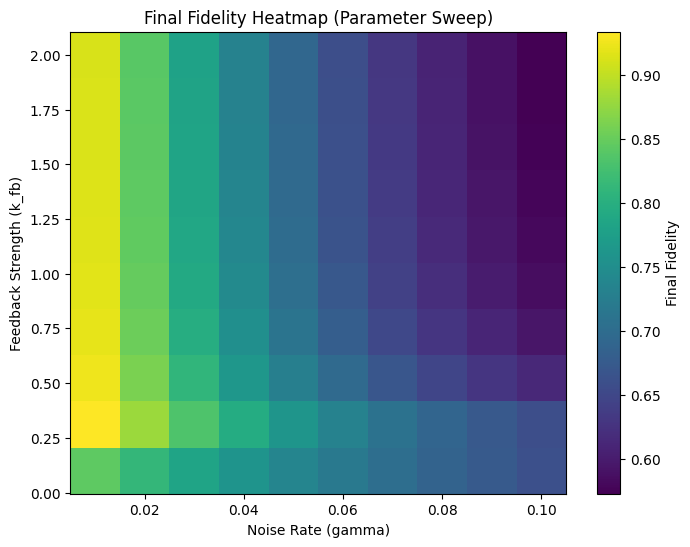

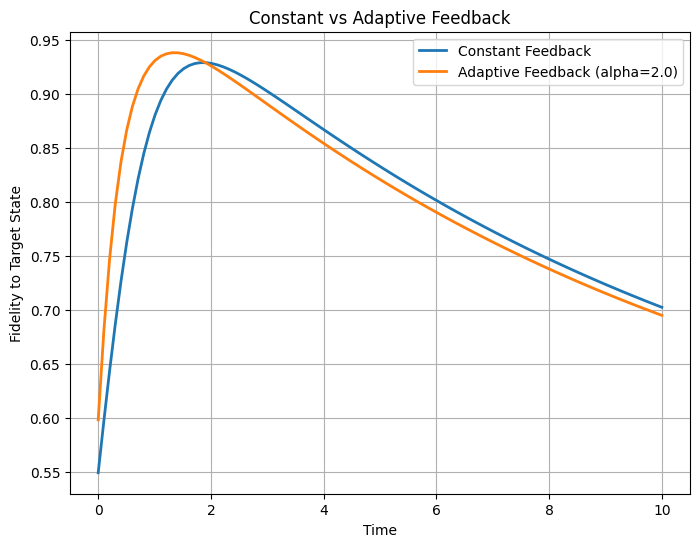

In [ ]:
#!/usr/bin/env python3
"""
Parameter Sweeps and Adaptive Feedback for Quantum State Refinement

This script demonstrates two key extensions to a basic feedback protocol:
1) Parameter sweeps over feedback strength (k_fb) and noise (gamma) to
   generate a heatmap of final fidelities.
2) An enhanced (adaptive) feedback method, where k_fb is dynamically adjusted
   based on the current fidelity, aiming to maintain high fidelity longer.

Author: Vignesh
Date: 19/02/2025
"""

import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, Qobj, sigmaz

# =============================================================================
# 1. Basic Feedback Simulation with Noise
# =============================================================================

def run_feedback_simulation(rho_initial: Qobj, rho_target: Qobj,
                            dt: float, n_steps: int,
                            k_fb: float, gamma: float) -> np.ndarray:
    """
    Simulate the evolution of a quantum state under a constant-feedback protocol
    with dephasing noise (gamma).

    Args:
        rho_initial (Qobj): Initial density matrix.
        rho_target (Qobj): Target density matrix.
        dt (float): Time step per iteration.
        n_steps (int): Number of iterations.
        k_fb (float): Constant feedback strength.
        gamma (float): Dephasing noise rate.

    Returns:
        fidelities (np.ndarray): Fidelity to rho_target at each time step.
    """
    # Dephasing noise operator
    L = np.sqrt(gamma) * sigmaz()

    fidelities = []
    rho = rho_initial.copy()

    for _ in range(n_steps):
        # Feedback Hamiltonian: H_fb = i * k_fb * (rho_target*rho - rho*rho_target)
        H_fb = 1j * k_fb * (rho_target * rho - rho * rho_target)

        # Unitary evolution from feedback
        U = (-1j * H_fb * dt).expm()
        rho = U * rho * U.dag()

        # Dephasing noise via Euler step
        noise_term = dt * (L * rho * L.dag() - 0.5 * (L.dag() * L * rho + rho * L.dag() * L))
        rho = rho + noise_term

        # Normalize
        rho = rho / rho.tr()

        # Record fidelity
        fid = (rho_target * rho).tr().real
        fidelities.append(fid)

    return np.array(fidelities)

# =============================================================================
# 2. Adaptive Feedback Simulation
# =============================================================================

def run_adaptive_feedback_simulation(rho_initial: Qobj, rho_target: Qobj,
                                     dt: float, n_steps: int,
                                     k_fb0: float, gamma: float,
                                     alpha: float) -> np.ndarray:
    """
    Simulate a quantum state under an *adaptive* feedback protocol where
    the feedback strength k_fb is dynamically adjusted based on the current
    fidelity: k_fb(t) = k_fb0 * (1 + alpha * [1 - fidelity]).

    Args:
        rho_initial (Qobj): Initial density matrix.
        rho_target (Qobj): Target density matrix.
        dt (float): Time step per iteration.
        n_steps (int): Number of iterations.
        k_fb0 (float): Base feedback strength.
        gamma (float): Dephasing noise rate.
        alpha (float): Adaptation rate (0 -> no adaptation; higher -> stronger adaptation).

    Returns:
        fidelities (np.ndarray): Fidelity to rho_target at each time step.
    """
    L = np.sqrt(gamma) * sigmaz()

    fidelities = []
    rho = rho_initial.copy()

    for _ in range(n_steps):
        # Current fidelity
        current_fid = (rho_target * rho).tr().real

        # Adapt feedback strength: k_fb(t) = k_fb0 * (1 + alpha*(1 - fidelity))
        k_fb_t = k_fb0 * (1.0 + alpha * (1.0 - current_fid))

        # Feedback Hamiltonian
        H_fb = 1j * k_fb_t * (rho_target * rho - rho * rho_target)

        # Unitary evolution from feedback
        U = (-1j * H_fb * dt).expm()
        rho = U * rho * U.dag()

        # Dephasing noise
        noise_term = dt * (L * rho * L.dag() - 0.5 * (L.dag() * L * rho + rho * L.dag() * L))
        rho = rho + noise_term

        # Normalize
        rho = rho / rho.tr()

        fidelities.append((rho_target * rho).tr().real)

    return np.array(fidelities)

# =============================================================================
# 3. Parameter Sweep (k_fb vs gamma)
# =============================================================================

def parameter_sweep(rho_initial: Qobj, rho_target: Qobj,
                    dt: float, n_steps: int,
                    k_fb_values: np.ndarray,
                    gamma_values: np.ndarray) -> np.ndarray:
    """
    Sweep over feedback strength (k_fb) and noise (gamma), returning the final fidelity
    for each combination.

    Args:
        rho_initial (Qobj): Initial density matrix.
        rho_target (Qobj): Target density matrix.
        dt (float): Time step per iteration.
        n_steps (int): Number of iterations.
        k_fb_values (np.ndarray): Array of k_fb values to test.
        gamma_values (np.ndarray): Array of gamma values to test.

    Returns:
        fidelity_map (np.ndarray): 2D array of shape (len(k_fb_values), len(gamma_values))
                                  containing final fidelities.
    """
    fidelity_map = np.zeros((len(k_fb_values), len(gamma_values)))

    for i, k_fb in enumerate(k_fb_values):
        for j, gamma in enumerate(gamma_values):
            fidelities = run_feedback_simulation(rho_initial, rho_target,
                                                 dt, n_steps, k_fb, gamma)
            fidelity_map[i, j] = fidelities[-1]  # Final fidelity

    return fidelity_map

# =============================================================================
# 4. Plotting Functions
# =============================================================================

def plot_heatmap(k_fb_values, gamma_values, fidelity_map):
    """
    Plot a heatmap of final fidelities as a function of (k_fb, gamma).
    """
    plt.figure(figsize=(8, 6))
    X, Y = np.meshgrid(gamma_values, k_fb_values)
    c = plt.pcolormesh(X, Y, fidelity_map, cmap='viridis', shading='auto')
    plt.colorbar(c, label='Final Fidelity')
    plt.xlabel("Noise Rate (gamma)")
    plt.ylabel("Feedback Strength (k_fb)")
    plt.title("Final Fidelity Heatmap (Parameter Sweep)")
    plt.show()

def plot_fidelity_curves(times, fidelities_list, labels_list, title="Fidelity vs Time"):
    """
    Plot multiple fidelity curves on the same figure.
    """
    plt.figure(figsize=(8, 6))
    for fid, lbl in zip(fidelities_list, labels_list):
        plt.plot(times, fid, label=lbl, lw=2)
    plt.xlabel("Time")
    plt.ylabel("Fidelity to Target State")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# =============================================================================
# 5. Main Demonstration
# =============================================================================

def main():
    # Simulation settings
    dt = 0.1
    n_steps = 100
    times = np.linspace(0, dt*n_steps, n_steps)

    # Define target state: |+> = (|0> + |1>)/sqrt(2)
    from qutip import basis
    plus_state = (basis(2, 0) + basis(2, 1)).unit()
    rho_target = plus_state * plus_state.dag()

    # Initial state: |0>
    rho_initial = basis(2, 0) * basis(2, 0).dag()

    # --- 1) Parameter Sweep Example ---
    k_fb_values = np.linspace(0.1, 2.0, 10)   # 10 points from 0.1 to 2.0
    gamma_values = np.linspace(0.01, 0.1, 10) # 10 points from 0.01 to 0.1

    fidelity_map = parameter_sweep(rho_initial, rho_target,
                                   dt, n_steps, k_fb_values, gamma_values)

    plot_heatmap(k_fb_values, gamma_values, fidelity_map)

    # --- 2) Compare Constant vs Adaptive Feedback ---

    # Choose a single pair (k_fb=1.0, gamma=0.05) for demonstration
    k_fb_fixed = 1.0
    gamma_fixed = 0.05

    # Run constant feedback
    fidelities_const = run_feedback_simulation(rho_initial, rho_target,
                                               dt, n_steps, k_fb_fixed, gamma_fixed)

    # Run adaptive feedback with some adaptation rate alpha
    alpha = 2.0  # The higher alpha is, the stronger the adaptation
    fidelities_adapt = run_adaptive_feedback_simulation(rho_initial, rho_target,
                                                        dt, n_steps,
                                                        k_fb_fixed, gamma_fixed,
                                                        alpha)

    # Plot both curves
    plot_fidelity_curves(times,
                         [fidelities_const, fidelities_adapt],
                         ["Constant Feedback", f"Adaptive Feedback (alpha={alpha})"],
                         title="Constant vs Adaptive Feedback")

if __name__ == "__main__":
    main()

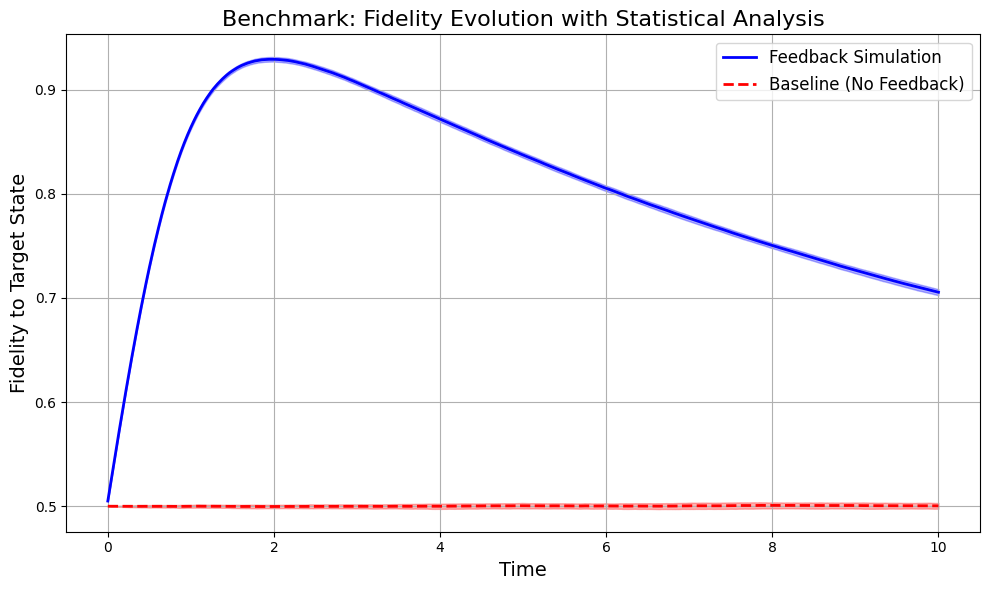

In [ ]:
#!/usr/bin/env python3
"""
Benchmarking Adaptive Quantum State Refinement with Statistical Analysis

This script performs multiple simulation runs of a feedback-controlled
quantum state refinement protocol with noise. It then computes the average
fidelity and standard deviation at each time point, comparing the feedback
protocol against a baseline (no feedback). The resulting plots include error
bars (or shaded regions) to indicate statistical reliability.

Requirements:
    - Python 3.x
    - QuTiP
    - NumPy
    - Matplotlib

Author: [Your Name]
Date: [Today's Date]
"""

import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, Qobj, sigmaz

# =============================================================================
# Simulation Functions with Stochastic Noise
# =============================================================================
def run_feedback_simulation_stochastic(rho_initial: Qobj, rho_target: Qobj,
                                         dt: float, n_steps: int,
                                         k_fb: float, gamma: float,
                                         noise_strength: float) -> np.ndarray:
    """
    Run one simulation run of the feedback-controlled evolution with noise.
    Here, we add a small random perturbation at each step (stochastic noise)
    to simulate variations in experimental conditions.

    Parameters:
        rho_initial (Qobj): The starting density matrix.
        rho_target (Qobj): The target density matrix.
        dt (float): Time step.
        n_steps (int): Number of iterations.
        k_fb (float): Feedback strength.
        gamma (float): Deterministic dephasing noise strength.
        noise_strength (float): Additional stochastic noise level.

    Returns:
        fidelities (np.ndarray): Array of fidelity values over time.
    """
    # Dephasing noise operator (deterministic part)
    L = np.sqrt(gamma) * sigmaz()

    fidelities = []
    rho = rho_initial.copy()

    for step in range(n_steps):
        # 1. Compute feedback Hamiltonian: H_fb = i * k_fb * (rho_target * rho - rho * rho_target)
        H_fb = 1j * k_fb * (rho_target * rho - rho * rho_target)

        # 2. Compute the unitary evolution due to feedback:
        U = (-1j * H_fb * dt).expm()
        rho = U * rho * U.dag()

        # 3. Add deterministic dephasing noise via Euler step:
        noise_term_det = dt * (L * rho * L.dag() - 0.5 * (L.dag() * L * rho + rho * L.dag() * L))
        rho = rho + noise_term_det

        # 4. Add an extra stochastic noise term:
        # Here we add a small random Hermitian perturbation.
        random_matrix = (np.random.randn(2, 2) + 1j * np.random.randn(2, 2))
        random_herm = (random_matrix + random_matrix.conj().T) / 2  # make it Hermitian
        noise_term_stoch = dt * noise_strength * Qobj(random_herm)
        rho = rho + noise_term_stoch

        # 5. Renormalize the density matrix (ensure trace equals 1)
        rho = rho / rho.tr()

        # 6. Record fidelity: F = Tr(rho_target * rho)
        fid = (rho_target * rho).tr().real
        fidelities.append(fid)

    return np.array(fidelities)

def run_baseline_simulation_stochastic(rho_initial: Qobj, rho_target: Qobj,
                                         dt: float, n_steps: int,
                                         gamma: float,
                                         noise_strength: float) -> np.ndarray:
    """
    Run one simulation run for the baseline (non-adaptive evolution) with noise.
    Here the system is not controlled by feedback, but noise (both deterministic and
    stochastic) still acts on it.

    Returns:
        fidelities (np.ndarray): Array of fidelity values over time.
    """
    L = np.sqrt(gamma) * sigmaz()

    fidelities = []
    rho = rho_initial.copy()

    for step in range(n_steps):
        # Baseline: no feedback Hamiltonian (free evolution)
        # Only noise evolves the state.
        noise_term_det = dt * (L * rho * L.dag() - 0.5 * (L.dag() * L * rho + rho * L.dag() * L))
        rho = rho + noise_term_det

        # Add stochastic noise as well:
        random_matrix = (np.random.randn(2, 2) + 1j * np.random.randn(2, 2))
        random_herm = (random_matrix + random_matrix.conj().T) / 2
        noise_term_stoch = dt * noise_strength * Qobj(random_herm)
        rho = rho + noise_term_stoch

        # Renormalize:
        rho = rho / rho.tr()

        fid = (rho_target * rho).tr().real
        fidelities.append(fid)

    return np.array(fidelities)

# =============================================================================
# Benchmarking: Running Multiple Simulation Runs
# =============================================================================
def run_multiple_simulations(rho_initial: Qobj, rho_target: Qobj, dt: float,
                             n_steps: int, k_fb: float, gamma: float,
                             noise_strength: float, num_runs: int, use_feedback: bool):
    """
    Run multiple simulation runs (Monte Carlo trajectories) and compute mean fidelity
    and standard deviation over time.

    Parameters:
        use_feedback (bool): If True, run feedback simulation; else, run baseline.

    Returns:
        mean_fid (np.ndarray): Mean fidelity at each time step.
        std_fid (np.ndarray): Standard deviation of fidelity at each time step.
    """
    all_fidelities = []
    for _ in range(num_runs):
        if use_feedback:
            fid = run_feedback_simulation_stochastic(rho_initial, rho_target,
                                                     dt, n_steps, k_fb, gamma, noise_strength)
        else:
            fid = run_baseline_simulation_stochastic(rho_initial, rho_target,
                                                     dt, n_steps, gamma, noise_strength)
        all_fidelities.append(fid)
    all_fidelities = np.array(all_fidelities)  # shape: (num_runs, n_steps)
    mean_fid = np.mean(all_fidelities, axis=0)
    std_fid = np.std(all_fidelities, axis=0)
    return mean_fid, std_fid

# =============================================================================
# Main Function: Benchmark and Statistical Analysis
# =============================================================================
def main():
    # Simulation parameters
    dt = 0.01         # Time step
    n_steps = 1000    # Number of iterations
    k_fb = 1.0        # Feedback strength constant for adaptive method
    gamma = 0.05      # Deterministic dephasing noise strength
    noise_strength = 0.02  # Stochastic noise strength (random fluctuations)
    num_runs = 50     # Number of simulation runs for statistical analysis

    # Define the target state: |+> = (|0> + |1>)/sqrt(2)
    plus_state = (basis(2, 0) + basis(2, 1)).unit()
    rho_target = plus_state * plus_state.dag()

    # Define an initial state (you could also vary this over multiple runs)
    rho_initial = basis(2, 0) * basis(2, 0).dag()

    # Run simulations for the feedback (adaptive) method
    mean_fb, std_fb = run_multiple_simulations(rho_initial, rho_target, dt, n_steps,
                                                 k_fb, gamma, noise_strength, num_runs, True)
    # Run simulations for the baseline (non-adaptive) method
    mean_base, std_base = run_multiple_simulations(rho_initial, rho_target, dt, n_steps,
                                                     k_fb, gamma, noise_strength, num_runs, False)

    times = np.linspace(0, n_steps*dt, n_steps)

    # Plotting: mean fidelity with error bands (mean +/- std)
    plt.figure(figsize=(10, 6))

    plt.plot(times, mean_fb, 'b-', lw=2, label='Feedback Simulation')
    plt.fill_between(times, mean_fb - std_fb, mean_fb + std_fb, color='b', alpha=0.3)

    plt.plot(times, mean_base, 'r--', lw=2, label='Baseline (No Feedback)')
    plt.fill_between(times, mean_base - std_base, mean_base + std_base, color='r', alpha=0.3)

    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Fidelity to Target State", fontsize=14)
    plt.title("Benchmark: Fidelity Evolution with Statistical Analysis", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

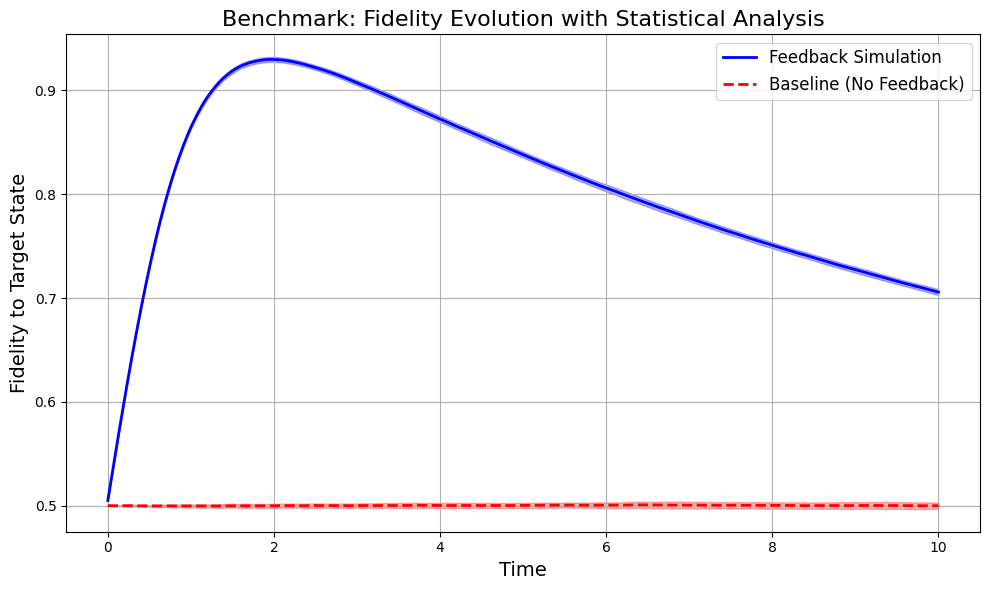

In [1]:
#!/usr/bin/env python3
"""
Benchmarking Adaptive Quantum State Refinement with Statistical Analysis

This script performs multiple simulation runs of a feedback-controlled 
quantum state refinement protocol with noise. It then computes the average 
fidelity and standard deviation at each time point, comparing the feedback 
protocol against a baseline (no feedback). The resulting plots include error 
bars (or shaded regions) to indicate statistical reliability.

Requirements:
    - Python 3.x
    - QuTiP
    - NumPy
    - Matplotlib

Author: [Your Name]
Date: [Today's Date]
"""

import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, Qobj, sigmaz

# =============================================================================
# Simulation Functions with Stochastic Noise
# =============================================================================
def run_feedback_simulation_stochastic(rho_initial: Qobj, rho_target: Qobj,
                                         dt: float, n_steps: int,
                                         k_fb: float, gamma: float,
                                         noise_strength: float) -> np.ndarray:
    """
    Run one simulation run of the feedback-controlled evolution with noise.
    Here, we add a small random perturbation at each step (stochastic noise) 
    to simulate variations in experimental conditions.
    
    Parameters:
        rho_initial (Qobj): The starting density matrix.
        rho_target (Qobj): The target density matrix.
        dt (float): Time step.
        n_steps (int): Number of iterations.
        k_fb (float): Feedback strength.
        gamma (float): Deterministic dephasing noise strength.
        noise_strength (float): Additional stochastic noise level.
        
    Returns:
        fidelities (np.ndarray): Array of fidelity values over time.
    """
    # Dephasing noise operator (deterministic part)
    L = np.sqrt(gamma) * sigmaz()
    
    fidelities = []
    rho = rho_initial.copy()

    for step in range(n_steps):
        # 1. Compute feedback Hamiltonian: H_fb = i * k_fb * (rho_target * rho - rho * rho_target)
        H_fb = 1j * k_fb * (rho_target * rho - rho * rho_target)
        
        # 2. Compute the unitary evolution due to feedback:
        U = (-1j * H_fb * dt).expm()
        rho = U * rho * U.dag()
        
        # 3. Add deterministic dephasing noise via Euler step:
        noise_term_det = dt * (L * rho * L.dag() - 0.5 * (L.dag() * L * rho + rho * L.dag() * L))
        rho = rho + noise_term_det
        
        # 4. Add an extra stochastic noise term:
        # Here we add a small random Hermitian perturbation.
        random_matrix = (np.random.randn(2, 2) + 1j * np.random.randn(2, 2))
        random_herm = (random_matrix + random_matrix.conj().T) / 2  # make it Hermitian
        noise_term_stoch = dt * noise_strength * Qobj(random_herm)
        rho = rho + noise_term_stoch
        
        # 5. Renormalize the density matrix (ensure trace equals 1)
        rho = rho / rho.tr()
        
        # 6. Record fidelity: F = Tr(rho_target * rho)
        fid = (rho_target * rho).tr().real
        fidelities.append(fid)
        
    return np.array(fidelities)

def run_baseline_simulation_stochastic(rho_initial: Qobj, rho_target: Qobj,
                                         dt: float, n_steps: int,
                                         gamma: float,
                                         noise_strength: float) -> np.ndarray:
    """
    Run one simulation run for the baseline (non-adaptive evolution) with noise.
    Here the system is not controlled by feedback, but noise (both deterministic and 
    stochastic) still acts on it.
    
    Returns:
        fidelities (np.ndarray): Array of fidelity values over time.
    """
    L = np.sqrt(gamma) * sigmaz()
    
    fidelities = []
    rho = rho_initial.copy()
    
    for step in range(n_steps):
        # Baseline: no feedback Hamiltonian (free evolution)
        # Only noise evolves the state.
        noise_term_det = dt * (L * rho * L.dag() - 0.5 * (L.dag() * L * rho + rho * L.dag() * L))
        rho = rho + noise_term_det
        
        # Add stochastic noise as well:
        random_matrix = (np.random.randn(2, 2) + 1j * np.random.randn(2, 2))
        random_herm = (random_matrix + random_matrix.conj().T) / 2
        noise_term_stoch = dt * noise_strength * Qobj(random_herm)
        rho = rho + noise_term_stoch
        
        # Renormalize:
        rho = rho / rho.tr()
        
        fid = (rho_target * rho).tr().real
        fidelities.append(fid)
        
    return np.array(fidelities)

# =============================================================================
# Benchmarking: Running Multiple Simulation Runs
# =============================================================================
def run_multiple_simulations(rho_initial: Qobj, rho_target: Qobj, dt: float, 
                             n_steps: int, k_fb: float, gamma: float, 
                             noise_strength: float, num_runs: int, use_feedback: bool):
    """
    Run multiple simulation runs (Monte Carlo trajectories) and compute mean fidelity
    and standard deviation over time.
    
    Parameters:
        use_feedback (bool): If True, run feedback simulation; else, run baseline.
        
    Returns:
        mean_fid (np.ndarray): Mean fidelity at each time step.
        std_fid (np.ndarray): Standard deviation of fidelity at each time step.
    """
    all_fidelities = []
    for _ in range(num_runs):
        if use_feedback:
            fid = run_feedback_simulation_stochastic(rho_initial, rho_target,
                                                     dt, n_steps, k_fb, gamma, noise_strength)
        else:
            fid = run_baseline_simulation_stochastic(rho_initial, rho_target,
                                                     dt, n_steps, gamma, noise_strength)
        all_fidelities.append(fid)
    all_fidelities = np.array(all_fidelities)  # shape: (num_runs, n_steps)
    mean_fid = np.mean(all_fidelities, axis=0)
    std_fid = np.std(all_fidelities, axis=0)
    return mean_fid, std_fid

# =============================================================================
# Main Function: Benchmark and Statistical Analysis
# =============================================================================
def main():
    # Simulation parameters
    dt = 0.01         # Time step
    n_steps = 1000    # Number of iterations
    k_fb = 1.0        # Feedback strength constant for adaptive method
    gamma = 0.05      # Deterministic dephasing noise strength
    noise_strength = 0.02  # Stochastic noise strength (random fluctuations)
    num_runs = 50     # Number of simulation runs for statistical analysis

    # Define the target state: |+> = (|0> + |1>)/sqrt(2)
    plus_state = (basis(2, 0) + basis(2, 1)).unit()
    rho_target = plus_state * plus_state.dag()

    # Define an initial state (you could also vary this over multiple runs)
    rho_initial = basis(2, 0) * basis(2, 0).dag()

    # Run simulations for the feedback (adaptive) method
    mean_fb, std_fb = run_multiple_simulations(rho_initial, rho_target, dt, n_steps,
                                                 k_fb, gamma, noise_strength, num_runs, True)
    # Run simulations for the baseline (non-adaptive) method
    mean_base, std_base = run_multiple_simulations(rho_initial, rho_target, dt, n_steps,
                                                     k_fb, gamma, noise_strength, num_runs, False)
    
    times = np.linspace(0, n_steps*dt, n_steps)
    
    # Plotting: mean fidelity with error bands (mean +/- std)
    plt.figure(figsize=(10, 6))
    
    plt.plot(times, mean_fb, 'b-', lw=2, label='Feedback Simulation')
    plt.fill_between(times, mean_fb - std_fb, mean_fb + std_fb, color='b', alpha=0.3)
    
    plt.plot(times, mean_base, 'r--', lw=2, label='Baseline (No Feedback)')
    plt.fill_between(times, mean_base - std_base, mean_base + std_base, color='r', alpha=0.3)
    
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Fidelity to Target State", fontsize=14)
    plt.title("Benchmark: Fidelity Evolution with Statistical Analysis", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
